### CS229 Problem Set #1

# CS 229, Public Course

## Problem Set #1: Supervised Learning

1. **Newton's method** for computing least squares

In this problem, we will prove that if we use **Newton’s method to solve the least squares optimization problem**, then **we only need one iteration to converge** to $\theta^*$.

> (a) Find the ***Hessian*** of the **cost function** $$J(\theta) = \frac{1}{2} \sum_{i=1}^m (\theta^T x^{(i)} − y^{(i)})^2 $$
>
> (b) Show that the first iteration of Newton’s method gives us $$\theta^* = ( X^T X )^{-1} X^T \vec{y}$$
> **the solution** to our least squares problem.

(a) Hessian of **cost function** $J(\theta)$

$$J(\theta) = \frac{1}{2} \sum_{i=1}^m (\theta^T x^{(i)} − y^{(i)})^2 =$$

matrix form:

$$= \frac{1}{2} \left( X\theta - y \right)^T \left( X\theta - y \right)$$

expand square:

$$= \frac{1}{2} \left( \theta^T X^T X \theta - \theta^T X^T y - y^T X \theta + y^T y \right) $$



$\DeclareMathOperator{\tr}{tr\,}$

because $J(\theta) \in R \implies \text{trace}\left( J(\theta)\right) = J(\theta)$

> $$J(\theta) = \frac{1}{2} \tr \left( \theta^T X^T X \theta - \theta^T X^T y - y^T X \theta + y^T y \right) $$

Matrix of first derivatives:

> $$\nabla J(\theta) = \nabla \frac{1}{2} \tr \left( \theta^T X^T X \theta - \theta^T X^T y - y^T X \theta + y^T y \right) $$

> $$= \frac{1}{2} \left(\nabla \tr ( \theta^T X^T X \theta ) - \nabla \tr (\theta^T X^T y) - \nabla \tr (y^T X \theta) + \nabla \tr (y^T y) \right) $$


Solving in parts:

> `i.` $\nabla \tr ( \theta^T X^T X \theta )$
>
> `ii.` $\nabla \tr (\theta^T X^T y)$
>
> `iii.` $\nabla \tr (y^T X \theta)$
>
> `iv.` $\nabla \tr (y^T y)$

`i.` $\nabla_\theta \tr ( \theta^T X^T X \theta )$

**Prop:**

> $\tr{ABC} = \tr CAB = \tr BCA$

$$\tr( \theta^T X^T X \theta ) = \tr ( \theta \theta^T X^T X )$$

$$\nabla_\theta \tr( \theta^T X^T X \theta ) = \nabla_\theta \tr ( \theta \theta^T X^T X )$$

$$$$

**Prop:**

> $\nabla _A \tr ABA^TC = CAB + C^TAB^T$

 $$= \nabla_\theta \tr ( \theta I \theta^T X^T X )$$

> where
>
> $A = \theta$
> 
> $B = I$
> 
> $C = X^TX$

$$= \tr ( \theta \ \  I \ \  \theta^T \ \  X^T X )$$

using prop:

 $$= X^TX \theta I + (X^TX)^T \theta I^T$$

 $$= X^TX \theta + X^TX \theta$$

> $$\nabla \tr ( \theta^T X^T X \theta ) = 2 X^TX \theta $$

`iii.` $\nabla_\theta \tr (y^T X \theta) = $

Using prop of permutation from before:

$$= \nabla_\theta \tr (\theta y^T X )$$

**Prop:**
> $\nabla_A \tr A B = B^T$

> where, if
>
> $A = \theta$
>
> $B = y^T X$

then:

$$= \left( y^T X \right)^T$$

> $$ \nabla_\theta \tr (y^T X \theta) =  X^T y $$

`ii.` $$\nabla_\theta \tr (\theta^T X^T y) =$$

**Prop:**

> $\tr A = \tr A^T$

$$= \nabla_\theta \tr (\theta^T X^T y)^T$$

$$= \nabla_\theta \tr (y^T X \theta)$$

Which is the same as `iii.`

> $$\nabla_\theta \tr (\theta^T X^T y) = X^T y$$

`iv.` Because $y$ does not depends on the parameters $\theta$

> $$\nabla_\theta \tr (y^T y) = 0$$



From before:

> $$= \frac{1}{2} \left(\nabla \tr ( \theta^T X^T X \theta ) - \nabla \tr (\theta^T X^T y) - \nabla \tr (y^T X \theta) + \nabla \tr (y^T y) \right) $$

Putting all `i-iv` together:

$$= \frac{1}{2} \left( 2 X^T X \theta - X^T y - X^T y \right)$$

$$= X^T X \theta - X^T y$$

> |Gradient of loss|
> |-|
> |$$\large{\nabla_\theta J(\theta) = X^T \left( X \theta - y \right)}$$|

---

We need the second derivatives for the Hessian.

**Prop:**
> if $y = A x $
>
> with $y \in R^{m \times 1}, A \in R^{m \times n}, x \in R^{n\times1}$
>
> then $\frac{\partial}{\partial x} y = A$

**Proof:**
> $\forall i \in [1,m]$
>
> $$y_i = \sum_{k=1}^n a_{ik} . x_k$$
>
>$\forall j \in [1,n]$
>
> $$\frac{\partial}{\partial x_j} y_i = \frac{\partial}{\partial x_j} \sum_{k=1}^n a_{ik} . x_k$$
>
> $$= \sum_{k=1}^n a_{ik} . \mathbb{1}\{j=k \}$$
>
> $$\frac{\partial}{\partial x_j} y_i = a_{ij}$$

From before:

$$\nabla_\theta J(\theta) = X^T X \theta - X^T y$$

Using prop for taking derivatives:

>|Solution:|
>|-|
>|$$\boxed{\large{\mathcal{H}_\theta J(\theta) = X^T X}}$$|

where:

$$X^T X = \begin{bmatrix}
    \sum_{j=1}^n (x_j^{(1)})^2 \\
    \sum_{j=1}^n (x_j^{(2)})^2 \\
    \vdots \\
    \sum_{j=1}^n (x_j^{(m)})^2
\end{bmatrix} \in R^{m}$$

> **(b)** Show that the first iteration of Newton’s method gives us
>
> $$\theta^* = ( X^T X )^{-1} X^T \vec{y}$$
>
> **the solution** to our least squares problem.

From **(a)**:

$$\nabla_\theta J(\theta) = X^T X \theta - X^T y$$

Because $J(\theta)$ is quadratic, there are absolutes guarantees that it has **one and only one critical point**, which is going to be the **minimum**.

if we set 

$$\nabla_\theta J(\theta) = 0$$

we'll find the **parameters $\theta^*$ that minimize the cost function** $J(\theta)$

$$X^T X \theta - X^T y = 0$$

$$X^T X \theta = X^T y$$

$$(X^T X)^{-1}(X^T X) \ \theta = (X^T X)^{-1} X^T y$$

> |Solution:|
> |-|
> |$$\boxed{\large{\theta^* = (X^T X)^{-1} X^T y}}$$|

**Proof** using **Newton's method**

One iteration of Newton's method:

$$\theta^{(t+1)} = \theta^{(t)} - H^{-1} \nabla_\theta J(\theta)$$

From before

> $\mathcal{H}_\theta J(\theta) = X^T X$
>
> $\nabla_\theta J(\theta) = X^T X \theta - X^T y$

Replacing:

$$\theta^{(t+1)} = \theta^{(t)} - ((X^T X)^{-1} (X^T X \theta^{(t)} - X^T y)) $$

Distribution:

$$\theta^{(t+1)} = \theta^{(t)} - (X^T X)^{-1} (X^T X \theta^{(t)}) + (X^T X)^{-1} (X^T y) $$

Simplifying that identity:

$$\theta^{(t+1)} = \theta^{(t)} - \theta^{(t)} + (X^T X)^{-1} (X^T y) $$

> |Solution:|
> |-|
> |$$\boxed{\large{\theta^{(t+1)} = (X^T X)^{-1} X^T y}}$$|

Notice that $\theta^{(t)}$ can be **anything** to begin with, because it's simplified by $\nabla_{\theta^{(t)}} J(\theta^{(t)})$.

**More general:**

> ***At any time $t$, Newton's method will find the optimal $\theta^*$ in only one step.***

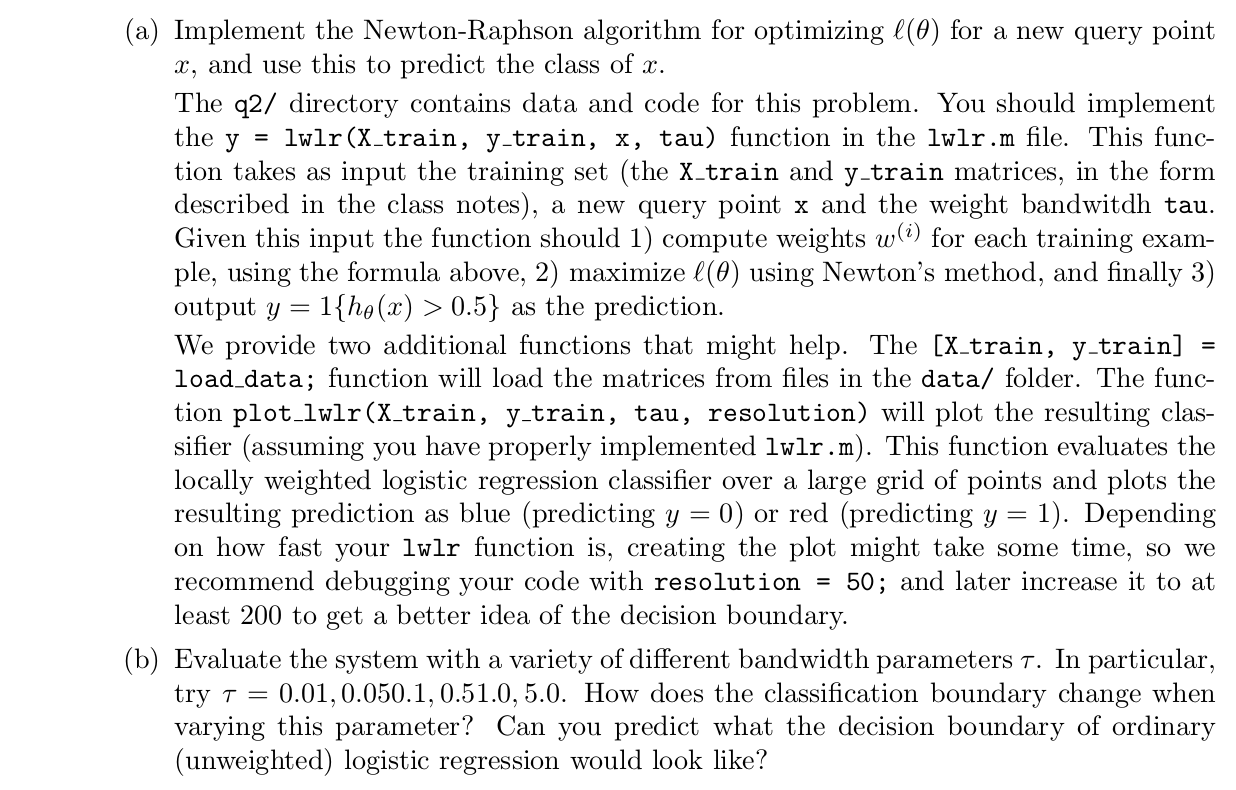

In [2]:
import numpy as np

def load_data():
    x = np.loadtxt('./ps1-q2/data/x.dat')
    y = np.loadtxt('./ps1-q2/data/y.dat')
    print('x data loaded with shape {}'.format(x.shape))
    print('y data loaded with shape {}'.format(y.shape))
    return x,y
x,y = load_data()

x data loaded with shape (69, 2)
y data loaded with shape (69,)


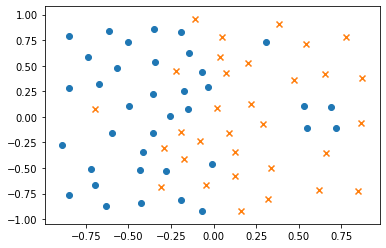

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x[y==0][:,0], x[y==0][:,1], marker='o')
plt.scatter(x[y==1][:,0], x[y==1][:,1], marker='x')
plt.show()

In [93]:
np.dot(np.ones((3,3)), np.ones((3,3)))

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

In [248]:
def weight(x, xi, tau):
    # Squared Exponential kernel
    return np.exp(-1./(2*tau**2) * np.linalg.norm((x-xi), ord=2))

def sigmoid(z):
    return 1./(1+np.exp(-z))

def h(theta, xi):
    #print('theta:', theta.shape, theta)
    #xi = np.asarray(xi)
    #print('xi:', xi.shape, xi)
    #print('thetaT X',np.matmul(np.transpose(theta), xi))
    #print(np.transpose(theta).shape)
    #print(np.exp(-np.dot(np.transpose(theta), xi)))
    linear = np.dot(np.transpose(theta), xi)
    return sigmoid(linear)

def locally_weighted_logistic_regression(X_train, y_train, x, tau=0.01):
    #print('X_train',X_train)
    #print('y_train',y_train)
    #print('x',x)
    #print('tau',tau)
    # Adding bias column
    X_train = np.c_[np.ones(69), X_train]
    x = np.hstack(([1], x))
    #print(X_train[1])
    # # of features
    n = X_train.shape[1]
    # # of training examples
    m = len(y)
    # Regularization parameter lambda
    lambd = 0.0001
    # Weights theta in R^n
    theta = np.zeros(n)
    # Regularization matrix for the Hessian
    regul = np.eye(n)
    np.fill_diagonal(regul, lambd)
    # Diagonal matrix
    D = np.eye(m)
    #print('weight(x, xi, tau)', weight(x, X_train[0], tau))
    #print('h(theta, xi):', h(theta, X_train[0]))
    diag = np.asarray([-weight(x, xi, tau)*(yi - h(theta, xi))*(1 - (yi - h(theta, xi))) for xi, yi in zip(X_train, y_train)])
    #print('D.shape',D.shape, D)
    #print('diag.shape',diag.shape, diag)
    D = np.multiply(D, diag)
    #print('D:', D.shape, D)
    #print('D:', D.shape)
    #print('X:', X_train.shape)
    #print('D x X:', np.matmul(D, X_train).shape, np.matmul(D, X_train))
    #print('Hasta aca funca bien')
    # Hessian of J(0)
    #print('Shape: ', np.dot(np.transpose(X_train), D).shape)
    H = np.dot(np.transpose(X_train), np.dot(D, X_train)) - regul
    #print('H shape:', H.shape, H)
    iH = np.linalg.inv(H)
    #
    z = np.array([weight(x, xi, tau)*(yi-h(theta, xi)) for xi, yi in zip(X_train, y_train)])
    # Gradient of J(0)
    gradJ = np.matmul(np.transpose(X_train), z) - lambd * theta
    # Newton's update
    #print('iH shape:', iH.shape, iH)
    #print('gradJ shape:', gradJ.shape, gradJ)
    theta = theta - np.dot(iH, gradJ)
    return h(theta, x)

locally_weighted_logistic_regression(x, y, np.array([-0.74792627, 0.6725731]), 0.01)

0.5

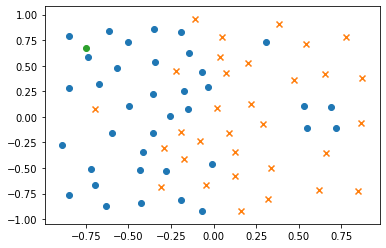

In [249]:
import matplotlib.pyplot as plt
plt.scatter(x[y==0][:,0], x[y==0][:,1], marker='o')
plt.scatter(x[y==1][:,0], x[y==1][:,1], marker='x')
plt.scatter(-0.74792627, 0.6725731, marker='o')
plt.show()

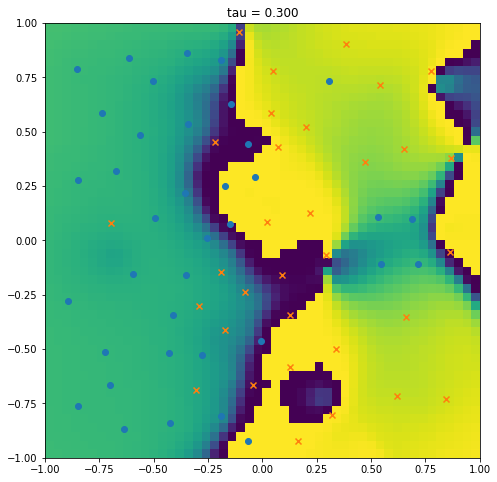

In [261]:
import itertools
# plot whatever you need...
# now, before saving to file:
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 8)
# when saving, specify the DPI

def lwlr_grid(X, y, i, j, res, tau):
    return locally_weighted_logistic_regression(X, y, np.asarray([2*i/(res-1)-1, 2*j/(res-1)-1]), tau)

def plot_lwlr(X, y, tau, res=50, save=False, idx=0):
    #x = np.zeros(2)
    pred = np.ndarray((res,res))
    #for i in range(res):
    #    for j in range(res):
    #        x[0] = 2*i/(res-1) - 1
    #        x[1] = 2*j/(res-1) - 1
    #        pred[j,i] = locally_weighted_logistic_regression(X, y, x, tau)
    pred = [lwlr_grid(X, y, i, j, res, tau) for i, j in itertools.product(range(res),range(res))]
    pred = np.reshape(pred, (res,res), order='F')
    #imagesc(pred, [-0.4 1.3]);
    plt.imshow(pred, extent=[-1, 1, -1, 1])
    #plot((res/2)*(1+X(y==0,1))+0.5, (res/2)*(1+X(y==0,2))+0.5, 'ko');
    #plot((res/2)*(1+X(y==1,1))+0.5, (res/2)*(1+X(y==1,2))+0.5, 'kx');
    plt.scatter(X[y==0][:,0], X[y==0][:,1], marker='o')
    plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='x')
    plt.title('tau = {0:.3f}'.format(tau))
    #text(res/2 - res/7, res + res/20, ['tau = ' num2str(tau)], 'FontSize', 18);
    if save:
        plt.savefig('./animation/{}.png'.format(idx), dpi=100)
        print('Saved ./animation/{}.png'.format(idx))
        plt.close()
    else:
        plt.show()
    
plot_lwlr(x, y, 0.3, 50)

In [262]:
for idx,tau in enumerate(np.arange(0.01, 1.1, 0.01)):
    plot_lwlr(x, y, tau, 50, save=True, idx=idx)

Saved ./animation/0.png
Saved ./animation/1.png
Saved ./animation/2.png
Saved ./animation/3.png
Saved ./animation/4.png
Saved ./animation/5.png
Saved ./animation/6.png
Saved ./animation/7.png
Saved ./animation/8.png
Saved ./animation/9.png
Saved ./animation/10.png
Saved ./animation/11.png
Saved ./animation/12.png
Saved ./animation/13.png
Saved ./animation/14.png
Saved ./animation/15.png
Saved ./animation/16.png
Saved ./animation/17.png
Saved ./animation/18.png
Saved ./animation/19.png
Saved ./animation/20.png
Saved ./animation/21.png
Saved ./animation/22.png
Saved ./animation/23.png
Saved ./animation/24.png
Saved ./animation/25.png
Saved ./animation/26.png
Saved ./animation/27.png
Saved ./animation/28.png
Saved ./animation/29.png
Saved ./animation/30.png
Saved ./animation/31.png
Saved ./animation/32.png
Saved ./animation/33.png
Saved ./animation/34.png
Saved ./animation/35.png
Saved ./animation/36.png
Saved ./animation/37.png
Saved ./animation/38.png
Saved ./animation/39.png
Saved ./an

![](https://media.giphy.com/media/JmbDjMPgWp3xw9UEZg/giphy.gif)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

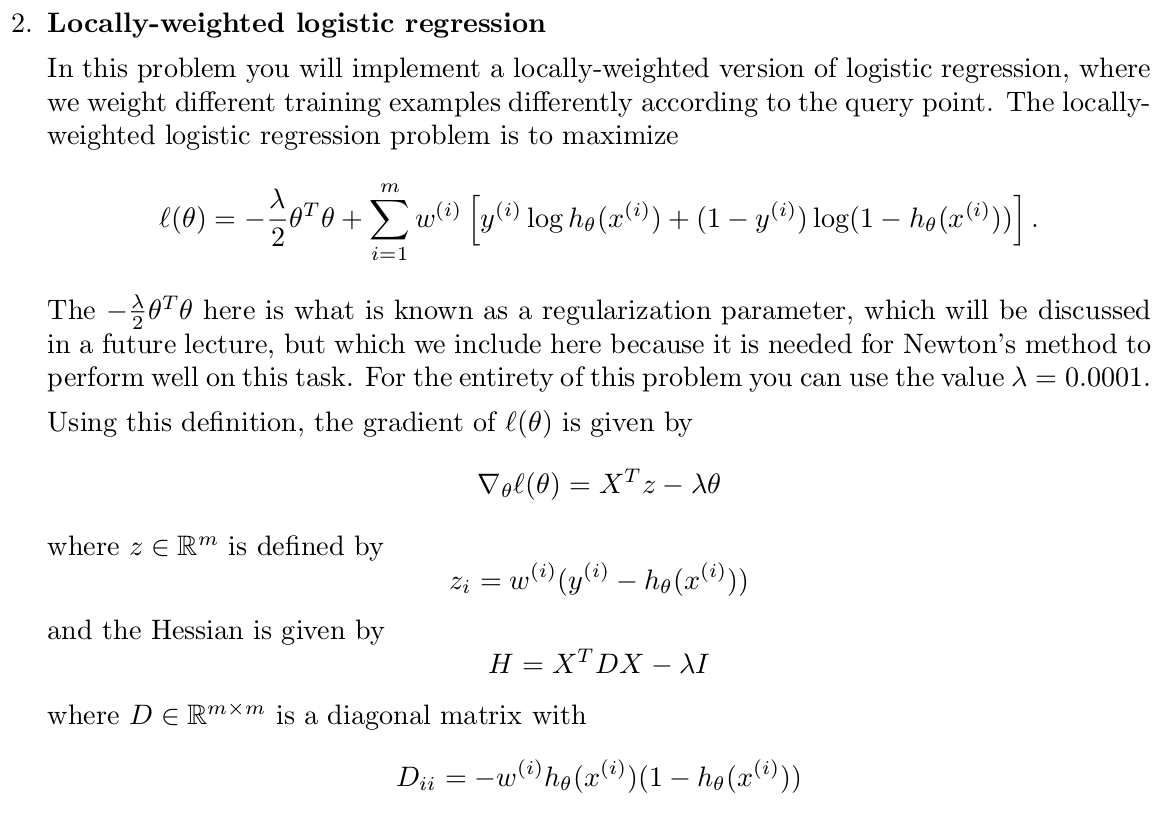

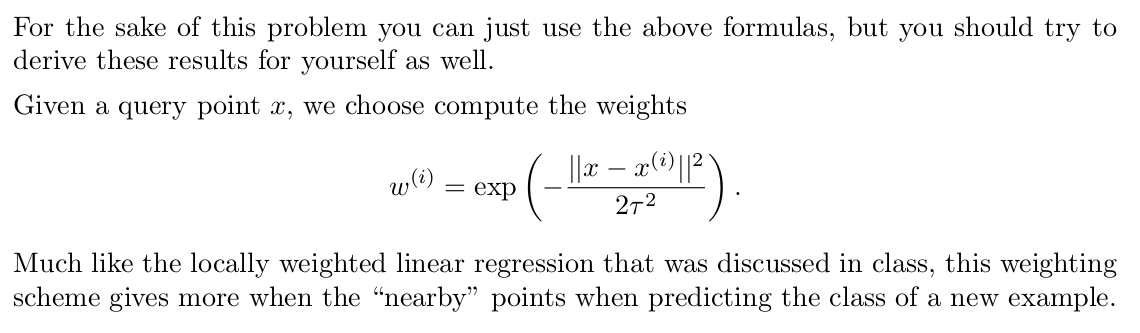

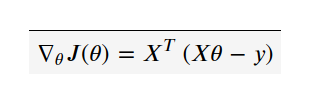